In [11]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import pickle
import json

import warnings

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from imblearn.over_sampling import SMOTE

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report,roc_curve


# Aim: To have a Genderilized model with Decision Tree.

In [12]:
warnings.filterwarnings('ignore')

In [13]:
df=pd.read_csv('heart.csv')

In [14]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [58]:
df.thal.value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [15]:
dictq=(df['age']).value_counts().to_dict()
first = dict(list(dictq.items())[:1])
print(first)

{58: 19}


In [16]:
key=list(dictq.keys())[0]
value=list(dictq.values())[0]
print(key,value)

58 19


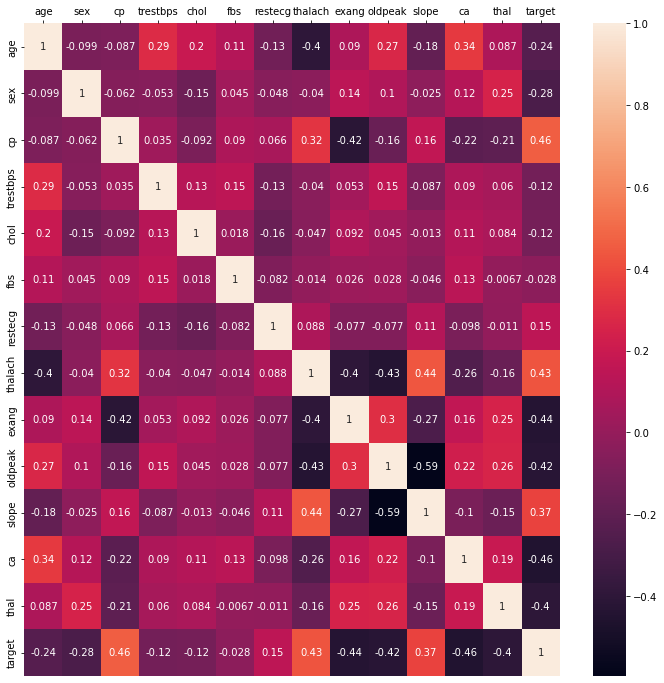

In [17]:
plt.figure(figsize=(12,12))
ax = sns.heatmap(df.corr(method="spearman"), annot=True)
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()

# Modeling

## Decision Tree Classifier Modeling

In [18]:
x=df.drop('target',axis=1)
y=df['target']

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=33,stratify=y,test_size=0.2)

In [20]:
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [21]:
y_predict_test=dt_model.predict(x_test)
print(f'accuracy_score= {accuracy_score(y_test,y_predict_test)}')
print(f'precision_score= {precision_score(y_test,y_predict_test)}')
print(f'recall_score= {recall_score(y_test,y_predict_test)}')
print(f'classification_report= {classification_report(y_test,y_predict_test)}')


accuracy_score= 0.7704918032786885
precision_score= 0.7317073170731707
recall_score= 0.9090909090909091
classification_report=               precision    recall  f1-score   support

           0       0.85      0.61      0.71        28
           1       0.73      0.91      0.81        33

    accuracy                           0.77        61
   macro avg       0.79      0.76      0.76        61
weighted avg       0.79      0.77      0.76        61



## ROC AUC Curve

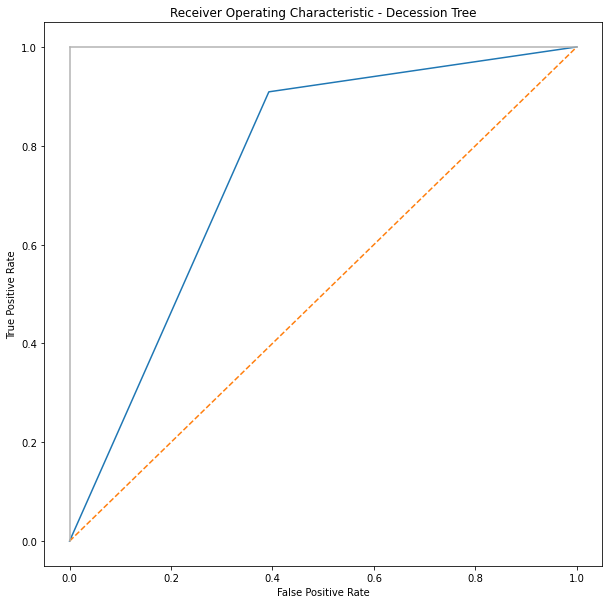

In [22]:
# ROC AUC Curve
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test,y_predict_test)
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Decession Tree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Hyper parameter tuning

In [23]:
hyp={'max_depth': np.arange(1,50),
    'min_samples_leaf': np.arange(1,50),
    'criterion': ["gini", "entropy"]}
dt_rscv=RandomizedSearchCV(dt_model,hyp,cv=5,random_state=45)
dt_rscv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
                   random_state=45)

In [24]:
dt_rscv.best_params_

{'min_samples_leaf': 11, 'max_depth': 47, 'criterion': 'entropy'}

# Testing data evaluation

In [25]:
y_rscv_predict_test=dt_rscv.predict(x_test)
print(f'accuracy_score= {accuracy_score(y_test,y_rscv_predict_test)}')
print(f'precision_score= {precision_score(y_test,y_rscv_predict_test)}')
print(f'recall_score= {recall_score(y_test,y_rscv_predict_test)}')
print(f'classification_report= {classification_report(y_test,y_rscv_predict_test)}')

accuracy_score= 0.7540983606557377
precision_score= 0.78125
recall_score= 0.7575757575757576
classification_report=               precision    recall  f1-score   support

           0       0.72      0.75      0.74        28
           1       0.78      0.76      0.77        33

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



# Training data evaluation

In [26]:
y_rscv_predict_train=dt_rscv.predict(x_train)
print(f'accuracy_score= {accuracy_score(y_train,y_rscv_predict_train)}')
print(f'precision_score= {precision_score(y_train,y_rscv_predict_train)}')
print(f'recall_score= {recall_score(y_train,y_rscv_predict_train)}')
print(f'classification_report= {classification_report(y_train,y_rscv_predict_train)}')

accuracy_score= 0.8471074380165289
precision_score= 0.9357798165137615
recall_score= 0.7727272727272727
classification_report=               precision    recall  f1-score   support

           0       0.77      0.94      0.85       110
           1       0.94      0.77      0.85       132

    accuracy                           0.85       242
   macro avg       0.86      0.85      0.85       242
weighted avg       0.86      0.85      0.85       242



### Target Accuracy 90%
### Training Accuracy 84%
### Testing Accuracy  is 75% 


# Low bias and high varience model is overfitting 

## For resolution of this model we will try with:
### 1) balancing data 
### 2) scaling data 
### 3) Hyper parameter Tuning with Cross Validation
    

# 1) Balancing data

In [27]:
sm=SMOTE(sampling_strategy='minority', random_state=42)

In [28]:
oversampled_X, oversampled_Y = sm.fit_resample(df.drop('target', axis=1), df['target'])

In [29]:
oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

In [30]:
oversampled.head()
x=oversampled.drop('target', axis=1)
y=oversampled['target']

# Train test split

In [31]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=44)

In [32]:
scaler = MinMaxScaler()
scaler.fit(X_train)    
scaler.transform(X_train)


array([[0.45833333, 1.        , 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.45833333, 0.        , 0.66666667, ..., 1.        , 0.25      ,
        0.66666667],
       [0.79166667, 1.        , 0.        , ..., 0.5       , 0.5       ,
        0.66666667],
       ...,
       [0.75      , 0.        , 0.66666667, ..., 1.        , 0.25      ,
        0.66666667],
       [0.33333333, 1.        , 0.        , ..., 0.5       , 0.5       ,
        1.        ],
       [0.625     , 1.        , 1.        , ..., 0.5       , 0.        ,
        1.        ]])

# 2) Data Scaling

In [33]:
mmscaler = MinMaxScaler()
X_train_norm = mmscaler.fit_transform(X_train)
X_test_norm = mmscaler.transform(X_test)


In [34]:
dt_model_scaled=DecisionTreeClassifier()
dt_model_scaled.fit(X_train,Y_train)

DecisionTreeClassifier()

# Testing Data Evolution

In [35]:
y_scaled_predict_test=dt_model_scaled.predict(X_test)
print(f'accuracy_score= {accuracy_score(Y_test,y_scaled_predict_test)}')
print(f'precision_score= {precision_score(Y_test,y_scaled_predict_test)}')
print(f'recall_score= {recall_score(Y_test,y_scaled_predict_test)}')
print(f'classification_report= {classification_report(Y_test,y_scaled_predict_test)}')

accuracy_score= 0.7878787878787878
precision_score= 0.8275862068965517
recall_score= 0.7272727272727273
classification_report=               precision    recall  f1-score   support

           0       0.76      0.85      0.80        33
           1       0.83      0.73      0.77        33

    accuracy                           0.79        66
   macro avg       0.79      0.79      0.79        66
weighted avg       0.79      0.79      0.79        66



# Training Data Evolution

In [36]:
y_scaled_predict_train=dt_model_scaled.predict(X_train)
print(f'accuracy_score= {accuracy_score(Y_train,y_scaled_predict_train)}')
print(f'precision_score= {precision_score(Y_train,y_scaled_predict_train)}')
print(f'recall_score= {recall_score(Y_train,y_scaled_predict_train)}')
print(f'classification_report= {classification_report(Y_train,y_scaled_predict_train)}')

accuracy_score= 1.0
precision_score= 1.0
recall_score= 1.0
classification_report=               precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       132

    accuracy                           1.00       264
   macro avg       1.00      1.00      1.00       264
weighted avg       1.00      1.00      1.00       264



# Model Overfitted

# 3) Hyper parameter Tuning with Cross Validation

In [37]:
hyp={'max_depth': np.arange(1,50),
    'min_samples_leaf': np.arange(1,50),
    'criterion': ["gini", "entropy"]}
dt_rscv_scaled=RandomizedSearchCV(dt_model,hyp,cv=5,random_state=66)
dt_rscv_scaled.fit(X_train,Y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
                   random_state=66)

In [38]:
dt_rscv_scaled.best_params_

{'min_samples_leaf': 8, 'max_depth': 36, 'criterion': 'entropy'}

# Testing Data Evolution

In [39]:
y_scaled_hyp_predict_test=dt_rscv_scaled.predict(X_test)
print(f'accuracy_score= {accuracy_score(Y_test,y_scaled_hyp_predict_test)}')
print(f'precision_score= {precision_score(Y_test,y_scaled_hyp_predict_test)}')
print(f'recall_score= {recall_score(Y_test,y_scaled_hyp_predict_test)}')
print(f'classification_report= {classification_report(Y_test,y_scaled_hyp_predict_test)}')

accuracy_score= 0.803030303030303
precision_score= 0.8125
recall_score= 0.7878787878787878
classification_report=               precision    recall  f1-score   support

           0       0.79      0.82      0.81        33
           1       0.81      0.79      0.80        33

    accuracy                           0.80        66
   macro avg       0.80      0.80      0.80        66
weighted avg       0.80      0.80      0.80        66



# Training Data Evolution

In [40]:
y_scaled_hyp_predict_train=dt_rscv_scaled.predict(X_train)
print(f'accuracy_score= {accuracy_score(Y_train,y_scaled_hyp_predict_train)}')
print(f'precision_score= {precision_score(Y_train,y_scaled_hyp_predict_train)}')
print(f'recall_score= {recall_score(Y_train,y_scaled_hyp_predict_train)}')
print(f'classification_report= {classification_report(Y_train,y_scaled_hyp_predict_train)}')

accuracy_score= 0.8787878787878788
precision_score= 0.9166666666666666
recall_score= 0.8333333333333334
classification_report=               precision    recall  f1-score   support

           0       0.85      0.92      0.88       132
           1       0.92      0.83      0.87       132

    accuracy                           0.88       264
   macro avg       0.88      0.88      0.88       264
weighted avg       0.88      0.88      0.88       264



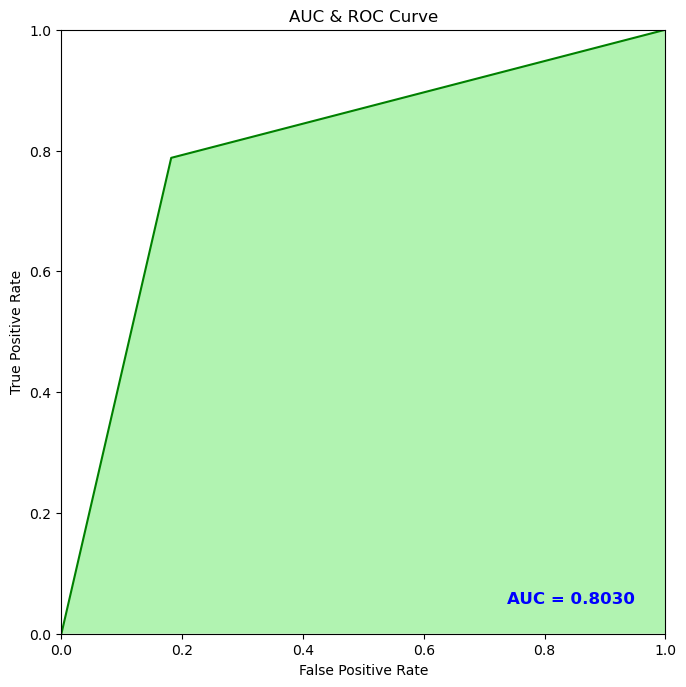

In [41]:
from sklearn import metrics
auc = metrics.roc_auc_score(Y_test,y_scaled_hyp_predict_test)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(Y_test,y_scaled_hyp_predict_test)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

#### Target accuracy_score    = 90 %
#### Training accuracy_score  = 87.87 %
#### Testing accuracy_score   = 80.30 %
#### Low Bias Low Varience
## Hence we have a Generilize Model

### Now Model Deployment Process

In [42]:
with open('Model.pkl','wb') as file:
    pickle.dump(dt_rscv_scaled,file)

In [43]:
List_col=X_train.columns.to_list()
columns_dict={'Columns': List_col}


In [44]:
with open('columns_name.json','w') as json_file:
    json.dump(columns_dict,json_file)